In [55]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install skyfield


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [201]:
csv = pd.read_csv("log_tinygs.csv", sep=";")
datetime3 = pd.to_datetime(csv['TOA (UTC+3)'])
datetime0 = pd.to_datetime(csv['TOA (UTC+0)'])
illuminated = csv['Illuminated'].astype('bool')
rtc = csv['RTC']
system_bus_voltage = csv['System Bus Voltage [mV]']
system_bus_current = csv['System Bus Current [mA]']
current_on_obc = csv['Current on OBC [mA]']
BA_charge_mah = csv['BA Charge [mA/h]']
current_on_rm1 = csv['Current on RM1 [mA]']
current_on_rm2 = csv['Current on RМ2 [mA]']
current_on_oss = csv['Current on OSS [mA]']
current_on_sdr = csv['Current on SDR [mA]']
current_on_sensor = csv['Current on Sensors [mA]']
current_on_sdr = csv['Current on SDR [mA]']
min_temp_BA = csv['Min Temp BA [C]']
max_temp_BA = csv['Max Temp BA [C]']
current_from_sp1 = csv['Current from SP1 [mA]']
current_from_sp2 = csv['Current from SP2 [mA]']
current_from_sp3 = csv['Current from SP3 [mA]']
current_from_sp4 = csv['Current from SP4 [mA]']
bus_voltage_sp = csv['Bus voltage SP']
BA_charge = csv['BA Charge %']
for col in csv.columns:
    print(col)

Name
TOA (UTC+3)
TOA (UTC+0)
Illuminated
RTC
OBC On/Off
RM0 On/Off
RM1 On/Off
OSS On/Off
Sensors On/Off
SDR On/Off
N/A 0
N/A 1
Guard flag OBC
Guard flag RM0
Guard flag RM1
Guard flag OSS
Guard flag Sensors
Guard flag SDR
N/A 2
N/A 3
System Bus Voltage [mV]
System Bus Current [mA]
BA Charge [mA/h]
Current on OBC [mA]
Current on RM1 [mA]
Current on RМ2 [mA]
Current on OSS [mA]
Current on Sensors [mA]
Current on SDR [mA]
Min Temp BA [C]
Max Temp BA [C]
Current from SP1 [mA]
Current from SP2 [mA]
Current from SP3 [mA]
Current from SP4 [mA]
Bus voltage SP
BA discharge On/Off 72
BA discharge On/Off 73
BA discharge On/Off 74
BA discharge On/Off 75
BA discharge On/Off 76
BA discharge On/Off 77
N/A 4
N/A 5
BA charge On/Off 72
BA charge On/Off 73
BA charge On/Off 74
BA charge On/Off 75
BA charge On/Off 76
BA charge On/Off 77
N/A 6
N/A 7
BA Charge %
Packet (HEX)


(844, 1921, 0, 30375)


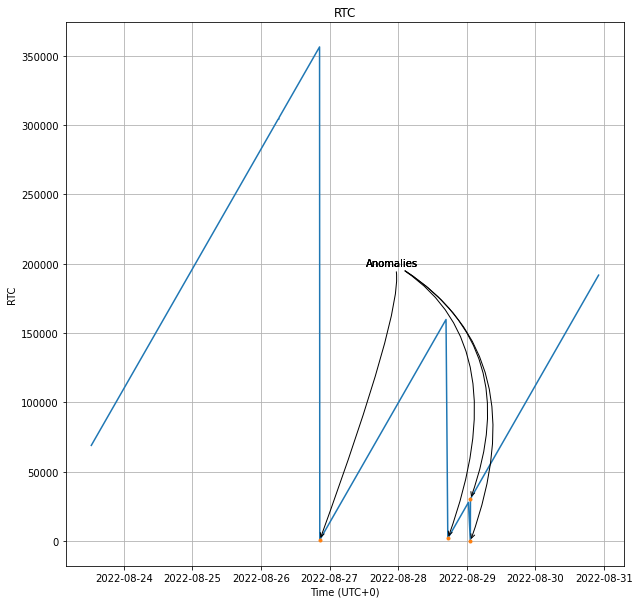

In [3]:
plt.figure(figsize=(10,10))
plt.plot(datetime0, rtc)
plt.title("RTC")
plt.xlabel("Time (UTC+0)")
plt.ylabel("RTC")
plt.grid(True)
time_anomalies, anomalies = zip(*[x for i, x in enumerate(zip(datetime0, rtc)) if np.abs(rtc.diff()[i]) > 20000])
print(anomalies)
plt.plot(time_anomalies, anomalies, '.')
for t, a in zip(time_anomalies, anomalies):
    plt.annotate("Anomalies", (t, a), xytext=(300, 300), textcoords='axes points',  arrowprops=dict(arrowstyle="->", connectionstyle="angle3,angleA=-30,angleB=70"))
plt.savefig("RTC.png")

In [4]:
from skyfield.api import load, wgs84, EarthSatellite
from skyfield.timelib import utc

In [5]:
def draw_polar_track(timeAnomalies, anomaliesValue, tleLine1, tleLine2, name):
    ts = load.timescale()
    satellite = EarthSatellite(tleLine1, tleLine2, 'Polytech_Universe-1', ts)
    print(satellite)
    t0 = ts.from_datetime(pd.Timestamp(timeAnomalies.timestamp() - anomaliesValue, unit='s').replace(tzinfo=utc))
    t1 = ts.from_datetime(pd.Timestamp(timeAnomalies.timestamp(), unit='s').replace(tzinfo=utc))

    timeline = ts.linspace(t0, t1, 500)

    geocentric = satellite.at(timeline)
    lat, lon = wgs84.latlon_of(geocentric)

    fig = plt.figure(figsize=(10,10))
    if (lat.degrees[0] < 0):
        plt.polar(lon.radians, lat.degrees)
        plt.polar(lon.radians[0], lat.degrees[0], 'o')
        plt.annotate("Suspected crash location", (lon.radians[0], lat.degrees[0]),
                     xytext=(10, -10), textcoords='offset points')
        plt.polar([135.866 / 180 * np.pi, 107.3 / 180 * np.pi], [-64.081, -80.7], 'o')
        plt.annotate("South geomagnetic pole", (107.3 / 180 * np.pi, -80.7),
                     xytext=(5, 5), textcoords='offset points')
        plt.annotate("South magnetic pole", (135.866 / 180 * np.pi, -64.081),
                     xytext=(5, 5), textcoords='offset points')
    else:
        plt.polar(lon.radians, -lat.degrees)
        plt.polar(lon.radians[0], -lat.degrees[0], 'o')
        plt.annotate("Suspected crash location", (lon.radians[0], -lat.degrees[0]),
                     xytext=(10, -10), textcoords='offset points')
        plt.polar([72.7 / 180 * np.pi, -162.867 / 180 * np.pi], [-80.7, -86.494], 'o')
        plt.annotate("North geomagnetic pole", (72.7 / 180 * np.pi, -80.7),
                     xytext=(5, 5), textcoords='offset points')
        plt.annotate("North magnetic pole", (-162.867 / 180 * np.pi, -86.494),
                     xytext=(5, 5), textcoords='offset points')
    plt.title(name)
    plt.savefig(name + ".png")

Polytech_Universe-1 catalog #53371 epoch 2022-08-26 10:58:50 UTC
Polytech_Universe-1 catalog #53371 epoch 2022-08-28 11:50:12 UTC


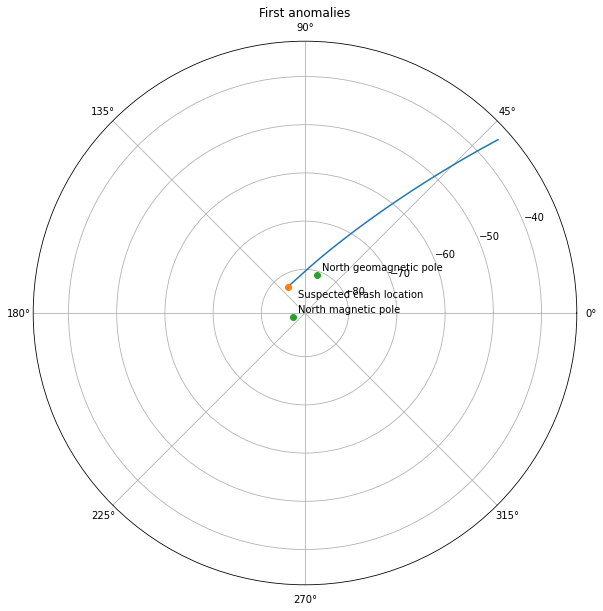

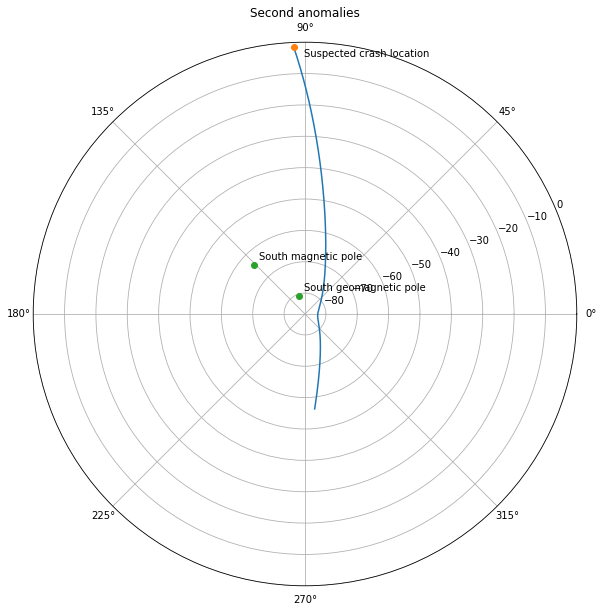

In [6]:
#For first anomaly
#1 53371U 22096B   22238.45751998  .00002996  00000-0  12493-3 0  9991
#2 53371  97.4359 139.7954 0003281 106.3324   8.1006 15.24465536  2636

#For second anomaly
#1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992
#2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940

line11 = '1 53371U 22096B   22238.45751998  .00002996  00000-0  12493-3 0  9991'
line12 = '2 53371  97.4359 139.7954 0003281 106.3324   8.1006 15.24465536  2636'
draw_polar_track(time_anomalies[0], anomalies[0], line11, line12, "First anomalies")
line21 = '1 53371U 22096B   22240.49319912  .00002597  00000-0  10865-3 0  9992'
line22 = '2 53371  97.4356 141.8151 0003228  98.8249  20.4295 15.24474492  2940'
draw_polar_track(time_anomalies[1], anomalies[1], line21, line22, "Second anomalies")

In [30]:
from astropy import units as u

from poliastro.bodies import Earth
from poliastro.plotting import OrbitPlotter3D

from warnings import warn

from astropy.coordinates import TEME, GCRS

from poliastro.ephem import Ephem
from poliastro.frames import Planes

import numpy as np

from astropy.coordinates import CartesianRepresentation, CartesianDifferential

from poliastro.util import time_range

from astropy.time import Time

from sgp4.api import Satrec


In [31]:
def ephem_from_gp(sat, times):
    errors, rs, vs = sat.sgp4_array(times.jd1, times.jd2)
    if not (errors == 0).all():
        warn(
            "Some objects could not be propagated, "
            "proceeding with the rest",
            stacklevel=2,
        )
        rs = rs[errors == 0]
        vs = vs[errors == 0]
        times = times[errors == 0]

    cart_teme = CartesianRepresentation(
        rs << u.km,
        xyz_axis=-1,
        differentials=CartesianDifferential(
            vs << (u.km / u.s),
            xyz_axis=-1,
        ),
    )
    cart_gcrs = (
        TEME(cart_teme, obstime=times)
        .transform_to(GCRS(obstime=times))
        .cartesian
    )

    return Ephem(cart_gcrs, times, plane=Planes.EARTH_EQUATOR)

In [32]:
sat = Satrec.twoline2rv(line11, line12)
print(sat.epochdays)

begin = Time(datetime0[0])
print(begin)
end = Time(datetime0[datetime0.size - 1])
print(end)
sat_ephem = ephem_from_gp(sat, time_range(begin, end=end, periods=5000))

plotter = OrbitPlotter3D()
plotter.set_attractor(Earth)
plotter.plot_ephem(sat_ephem, color="#333", label="ISS", trail=True)

plotter.show()

238.45751998
2022-08-23 12:36:07
2022-08-30 22:08:54


In [22]:
# Useful for defining quantities
from astropy import units as u

# Earth focused modules
from poliastro.earth import EarthSatellite
from poliastro.earth.plotting import GroundtrackPlotter
from poliastro.util import time_range
from poliastro.twobody import Orbit

In [50]:
# Generate an instance of the plotter, add title and show latlon grid
gp = GroundtrackPlotter()
gp.update_layout(title="Sattelite groundtrack")
begin = Time(pd.Timestamp(time_anomalies[0].timestamp() - anomalies[0], unit='s').replace(tzinfo=utc))
end = Time(time_anomalies[0])

sat = Satrec.twoline2rv(line11, line12)
sat_ephem = ephem_from_gp(sat, time_range(begin, end=end, periods=5000))

sat_orbit = Orbit.from_ephem(Earth, sat_ephem, sat_ephem.epochs[0])
sat = EarthSatellite(sat_orbit, None)

gp.plot(
    sat,
    time_range(begin, end=end + 24 * u.h, periods=5000),
    label="Satellite",
    color="black",
)

# For building geo traces
import plotly.graph_objects as go

# Position in [LAT LON]
south_geomagnetic_pole = [-80.7, 107.3] * u.deg
south_magnetic_pole = [-64.081, 135.866] * u.dex
north_geomagnetic_pole = [80.7, 72.7] * u.dex
north_magnetic_pole = [86.494, -162.867] * u.dex

# Let us add a new trace in original figure
gp.add_trace(
    go.Scattergeo(
        lat=south_geomagnetic_pole[0],
        lon=south_geomagnetic_pole[-1],
        name="South geomagnetic pole"
    )
)
gp.add_trace(
    go.Scattergeo(
        lat=south_magnetic_pole[0],
        lon=south_magnetic_pole[-1],
        name="South magnetic pole"
    )
)
gp.add_trace(
    go.Scattergeo(
        lat=north_geomagnetic_pole[0],
        lon=north_geomagnetic_pole[-1],
        name="North geomagnetic pole"
    )
)
gp.add_trace(
    go.Scattergeo(
        lat=north_magnetic_pole[0],
        lon=north_magnetic_pole[-1],
        name="North magnetic pole"
    )
)
gp.fig.show()

# Switch to three dimensional representation
gp.update_geos(projection_type="orthographic")
gp.fig.show()

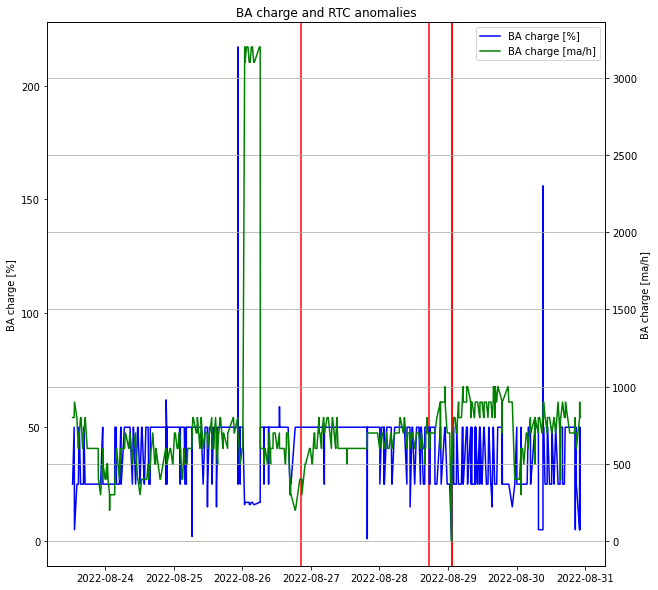

In [157]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.subplots()
ax1.axvline(time_anomalies[0], color='r')
ax1.axvline(time_anomalies[1], color='r')
ax1.axvline(time_anomalies[2], color='r')
ax1.axvline(time_anomalies[3], color='r')
curve1, = ax1.plot(datetime0, BA_charge, 'b', label="BA charge [%]")

ax2 = ax1.twinx()
curve2, = ax2.plot(datetime0, BA_charge_mah, 'g', label="BA charge [ma/h]")

curves = [curve1, curve2]
plt.legend(curves, [curve.get_label() for curve in curves])

plt.title("BA charge and RTC anomalies")
plt.xlabel("Time (UTC+0)")
ax1.set_ylabel("BA charge [%]")
ax2.set_ylabel("BA charge [ma/h]")
plt.grid(True)

In [131]:
print(csv.loc[pd.to_datetime(csv['TOA (UTC+0)']) == (time_anomalies[2])]['BA Charge %'])
print(csv.loc[csv['BA Charge %'] == 0]['BA Charge %'])

3476    0
3477    0
3478    0
Name: BA Charge %, dtype: int64
3476    0
3477    0
3478    0
Name: BA Charge %, dtype: int64


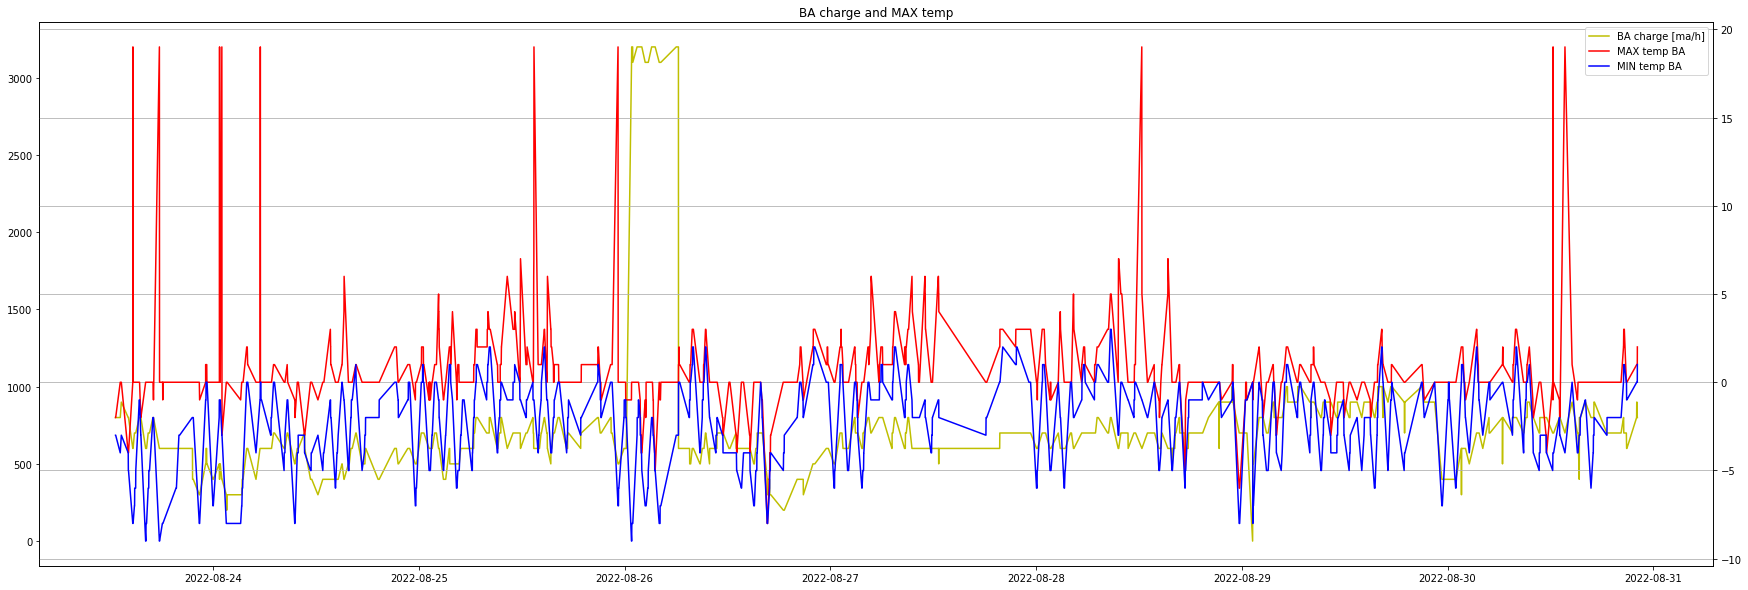

In [270]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(datetime0, BA_charge_mah, label="BA charge [ma/h]", color='y')
curve2, = ax2.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax2.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

# Make a curves list to access the parameters in the curves
curves = [curve1, curve2, curve3]

plt.legend(curves, [curve.get_label() for curve in curves])

# Global figure properties
plt.title("BA charge and MAX temp")
plt.grid(True)

plt.show()

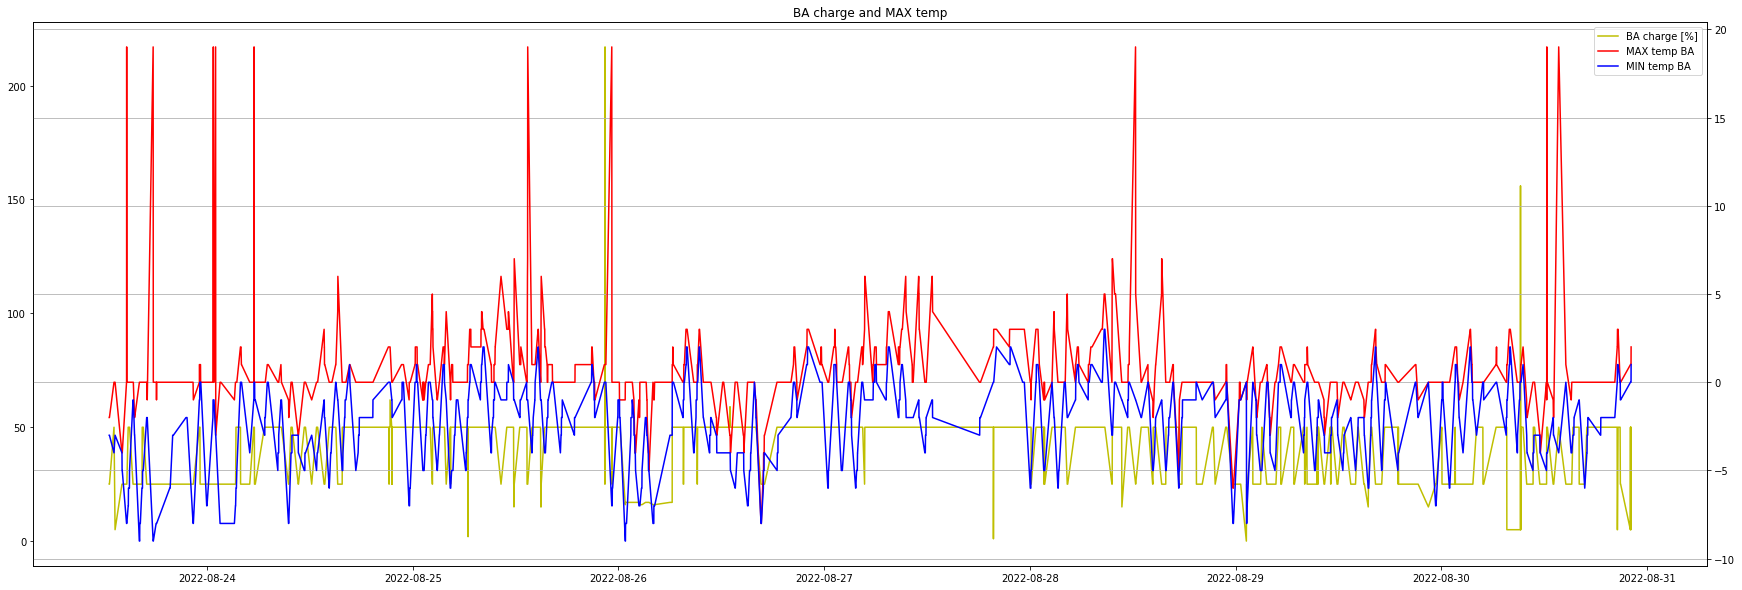

In [271]:
fig = plt.figure(figsize=(30,10))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(datetime0, BA_charge, label="BA charge [%]", color='y')
curve2, = ax2.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax2.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

# Make a curves list to access the parameters in the curves
curves = [curve1, curve2, curve3]

plt.legend(curves, [curve.get_label() for curve in curves])

# Global figure properties
plt.title("BA charge and MAX temp")
plt.grid(True)

plt.show()

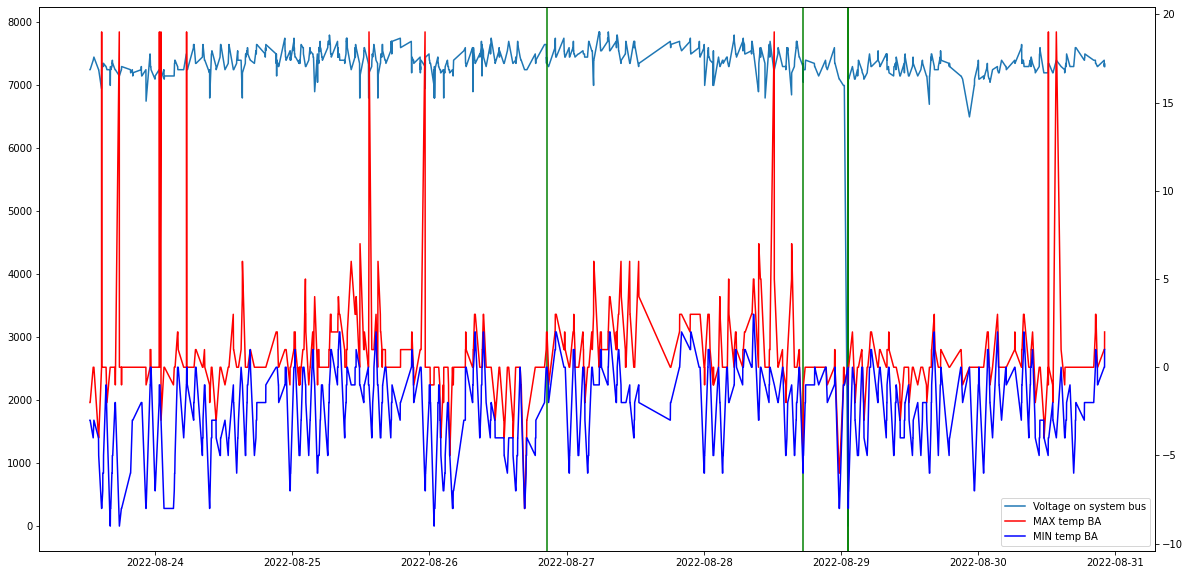

In [272]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(datetime0, system_bus_voltage,
                   label="Voltage on system bus")
curve2, = ax2.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax2.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

ax1.axvline(time_anomalies[0], color='g')
ax1.axvline(time_anomalies[1], color='g')
ax1.axvline(time_anomalies[2], color='g')
ax1.axvline(time_anomalies[3], color='g')

plt.legend(curves, [curve.get_label() for curve in curves])

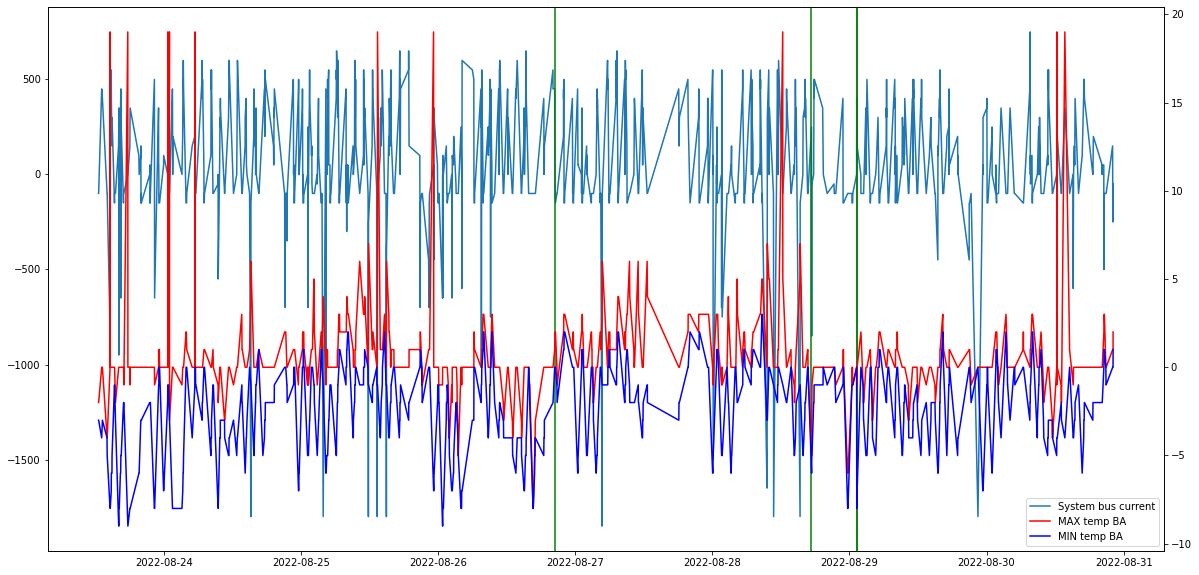

In [296]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(datetime0, system_bus_current,
                   label="System bus current")
curve2, = ax2.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax2.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

ax1.axvline(time_anomalies[0], color='g')
ax1.axvline(time_anomalies[1], color='g')
ax1.axvline(time_anomalies[2], color='g')
ax1.axvline(time_anomalies[3], color='g')

plt.legend(curves, [curve.get_label() for curve in curves])

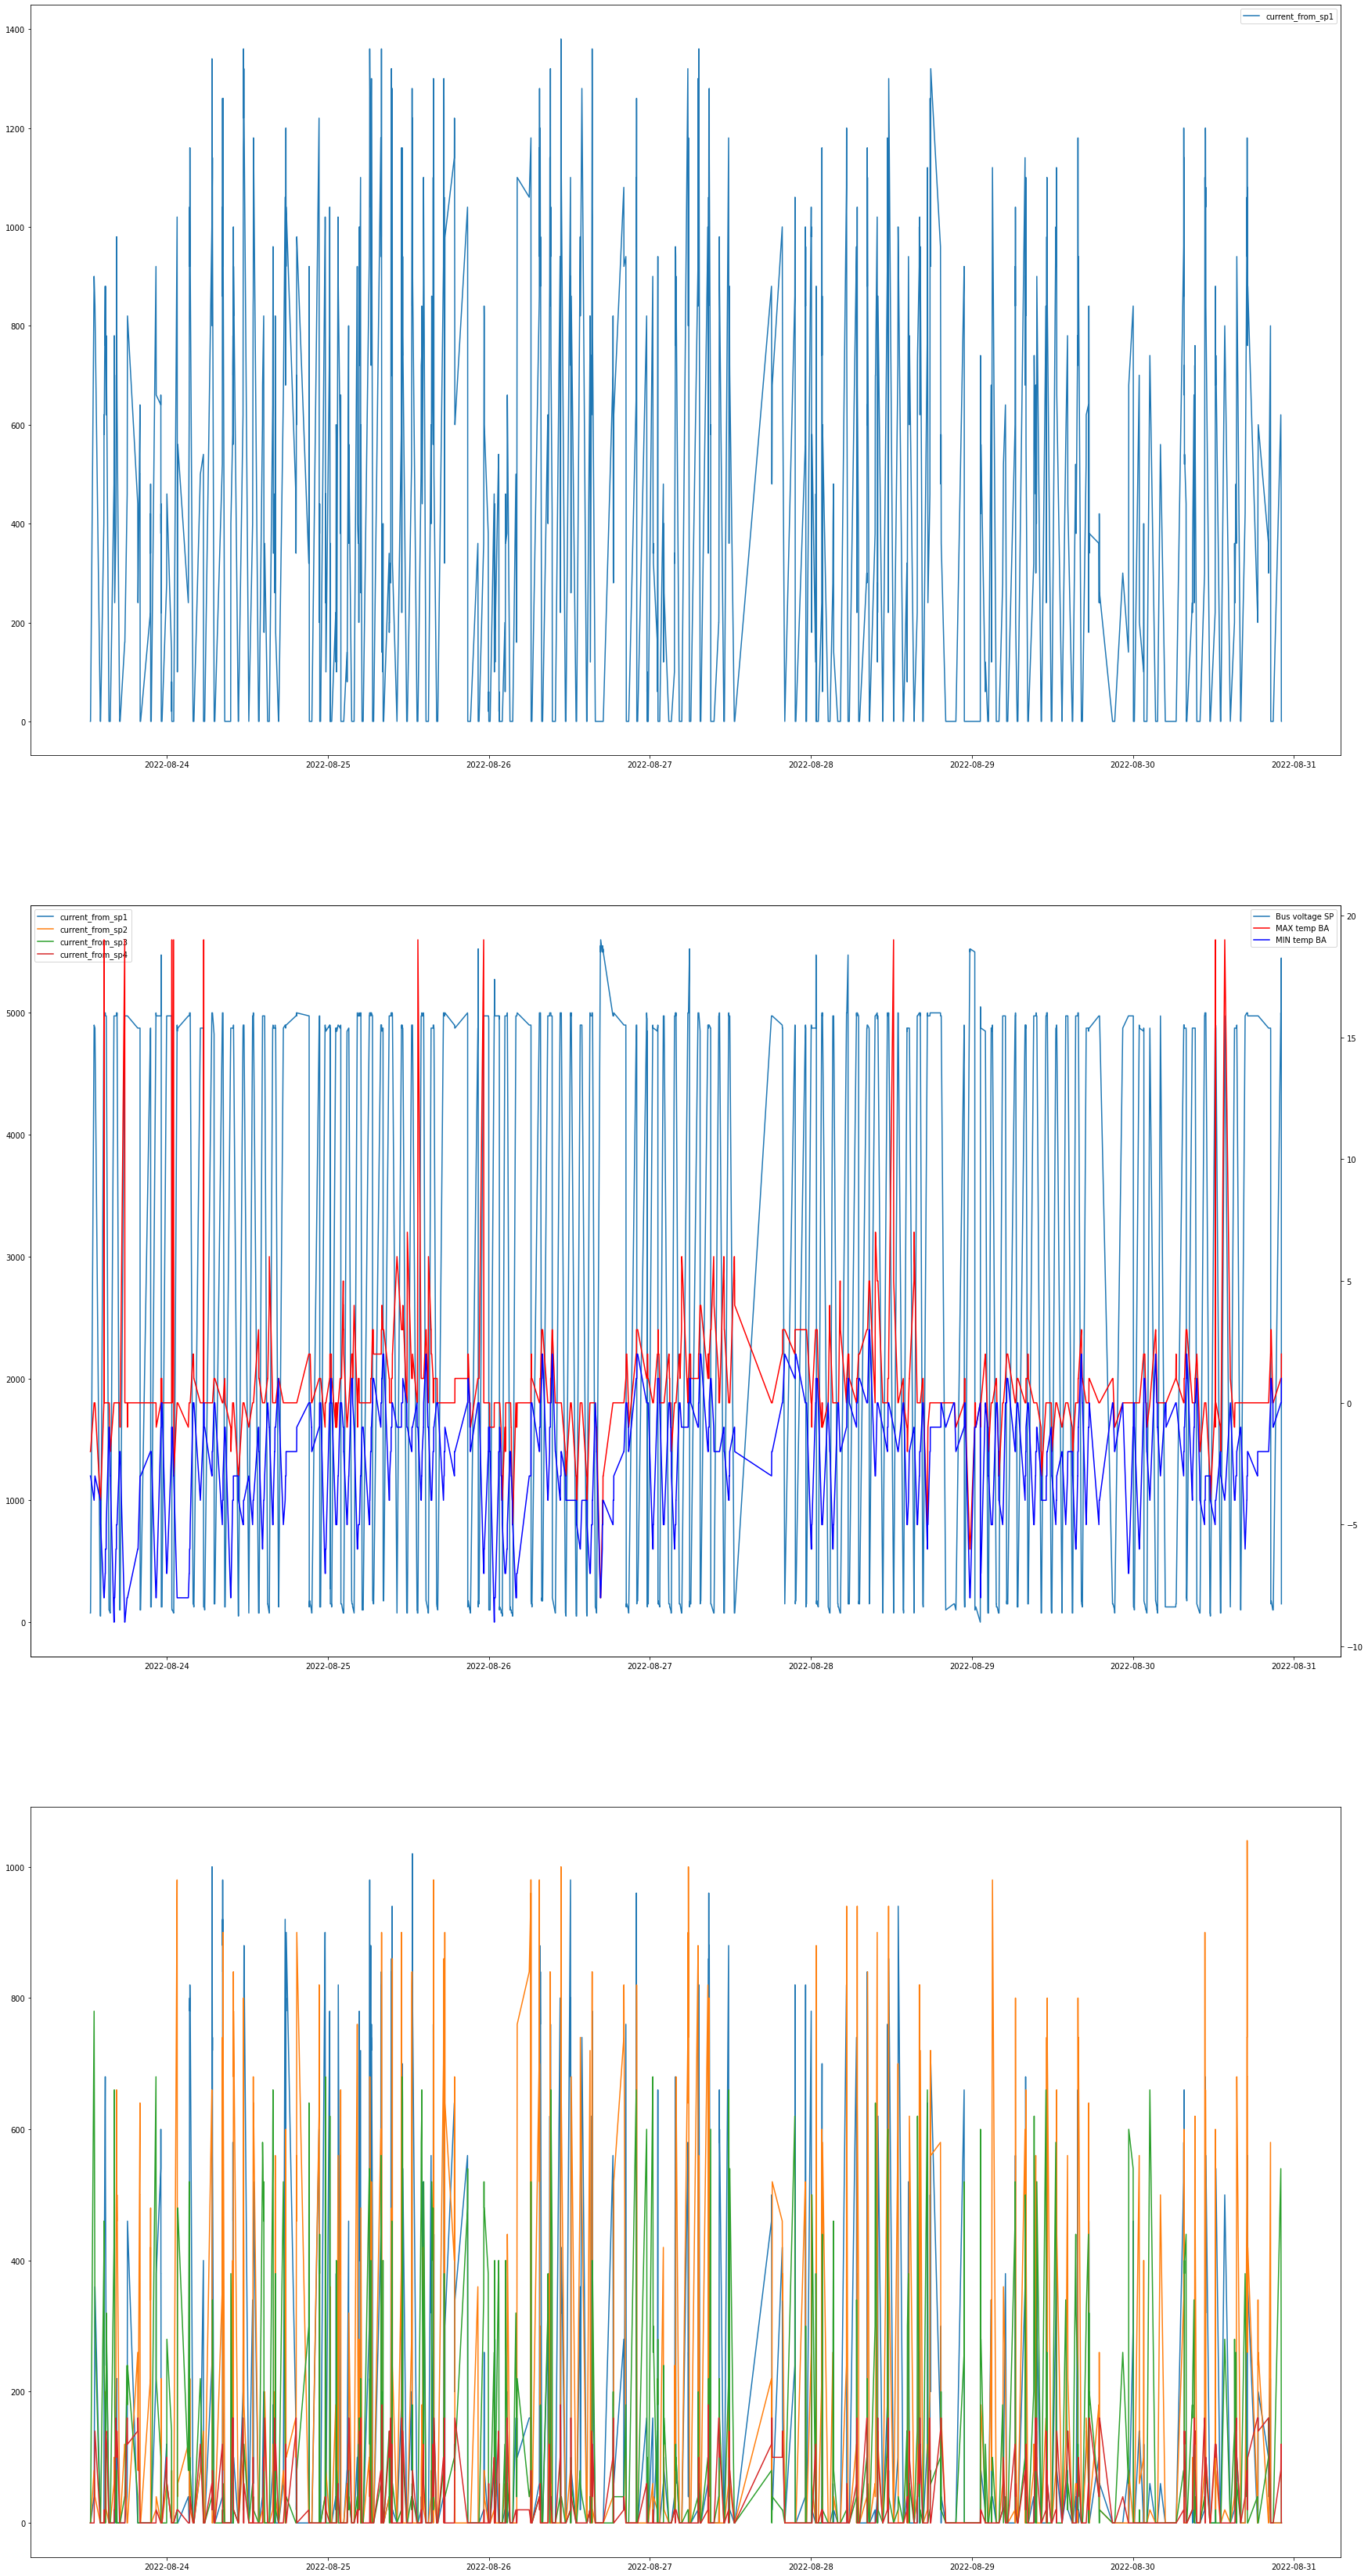

In [294]:
fig = plt.figure(figsize=(30,60))
axs = fig.subplots(3, 1)
ax02 = axs[1].twinx()

curve1, = axs[1].plot(datetime0, bus_voltage_sp, label="Bus voltage SP")
curve2, = ax02.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax02.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

ax1.axvline(time_anomalies[0], color='g')
ax1.axvline(time_anomalies[1], color='g')
ax1.axvline(time_anomalies[2], color='g')
ax1.axvline(time_anomalies[3], color='g')

plt.legend(curves, [curve.get_label() for curve in curves])


curve1, = axs[2].plot(datetime0, current_from_sp1, label="current_from_sp1")
curve2, = axs[2].plot(datetime0, current_from_sp2, label="current_from_sp2")
curve3, = axs[2].plot(datetime0, current_from_sp3, label="current_from_sp3")
curve4, = axs[2].plot(datetime0, current_from_sp4, label="current_from_sp4")
curves = [curve1, curve2, curve3, curve4]
axs[1].legend(curves, [curve.get_label() for curve in curves])


curve1, = axs[0].plot(datetime0, ((current_from_sp1 + current_from_sp2 + current_from_sp3 + current_from_sp4)),
                      label="current_from_sp1")
curves = [curve1]
axs[0].legend(curves, [curve.get_label() for curve in curves])

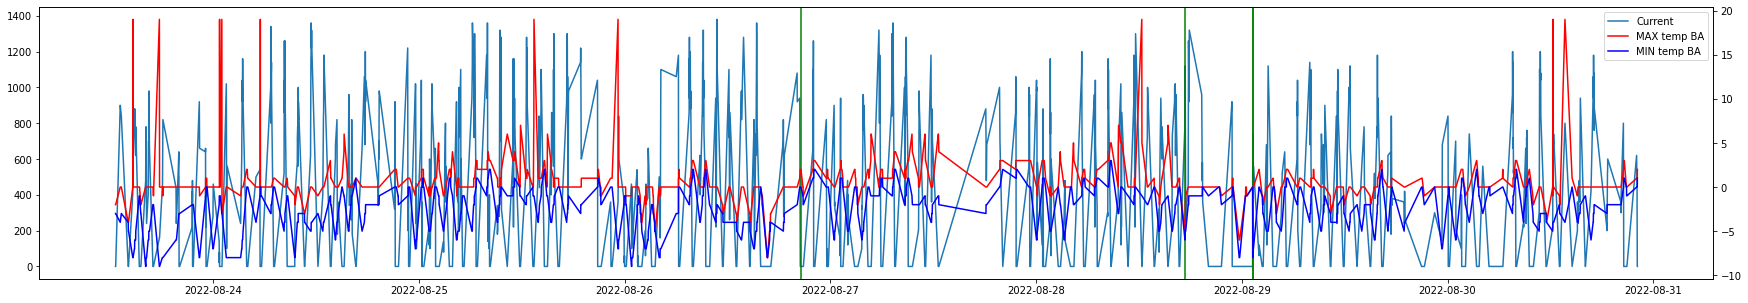

In [252]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(datetime0, current_from_sp1 + current_from_sp2 + current_from_sp3 + current_from_sp4,
                   label="Current")
curve2, = ax2.plot(datetime0, max_temp_BA, label="MAX temp BA", color='r')
curve3, = ax2.plot(datetime0, min_temp_BA, label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

ax1.axvline(time_anomalies[0], color='g')
ax1.axvline(time_anomalies[1], color='g')
ax1.axvline(time_anomalies[2], color='g')
ax1.axvline(time_anomalies[3], color='g')

plt.legend(curves, [curve.get_label() for curve in curves])

In [217]:
print(csv.corr()["Max Temp BA [C]"])

Illuminated               -0.099072
RTC                       -0.112872
OBC On/Off                -0.015177
RM0 On/Off                -0.015206
RM1 On/Off                 0.008389
OSS On/Off                 0.043879
Sensors On/Off             0.043879
SDR On/Off                -0.014270
N/A 0                           NaN
N/A 1                           NaN
Guard flag OBC                  NaN
Guard flag RM0                  NaN
Guard flag RM1                  NaN
Guard flag OSS                  NaN
Guard flag Sensors              NaN
Guard flag SDR                  NaN
N/A 2                           NaN
N/A 3                           NaN
System Bus Voltage [mV]    0.099608
System Bus Current [mA]   -0.083956
BA Charge [mA/h]          -0.124438
Current on OBC [mA]        0.016748
Current on RM1 [mA]        0.011128
Current on RМ2 [mA]        0.081453
Current on OSS [mA]        0.044467
Current on Sensors [mA]    0.044725
Current on SDR [mA]       -0.014850
Min Temp BA [C]            0

In [251]:
temp_anomalies = csv.loc[csv['Max Temp BA [C]'] >= 5]
cor = temp_anomalies.corr()
print(cor['Max Temp BA [C]'])

Illuminated                0.129651
RTC                        0.185848
OBC On/Off                      NaN
RM0 On/Off                      NaN
RM1 On/Off                      NaN
OSS On/Off                      NaN
Sensors On/Off                  NaN
SDR On/Off                      NaN
N/A 0                           NaN
N/A 1                           NaN
Guard flag OBC                  NaN
Guard flag RM0                  NaN
Guard flag RM1                  NaN
Guard flag OSS                  NaN
Guard flag Sensors              NaN
Guard flag SDR                  NaN
N/A 2                           NaN
N/A 3                           NaN
System Bus Voltage [mV]   -0.341034
System Bus Current [mA]    0.185651
BA Charge [mA/h]          -0.399091
Current on OBC [mA]             NaN
Current on RM1 [mA]             NaN
Current on RМ2 [mA]       -0.180783
Current on OSS [mA]             NaN
Current on Sensors [mA]         NaN
Current on SDR [mA]             NaN
Min Temp BA [C]           -0

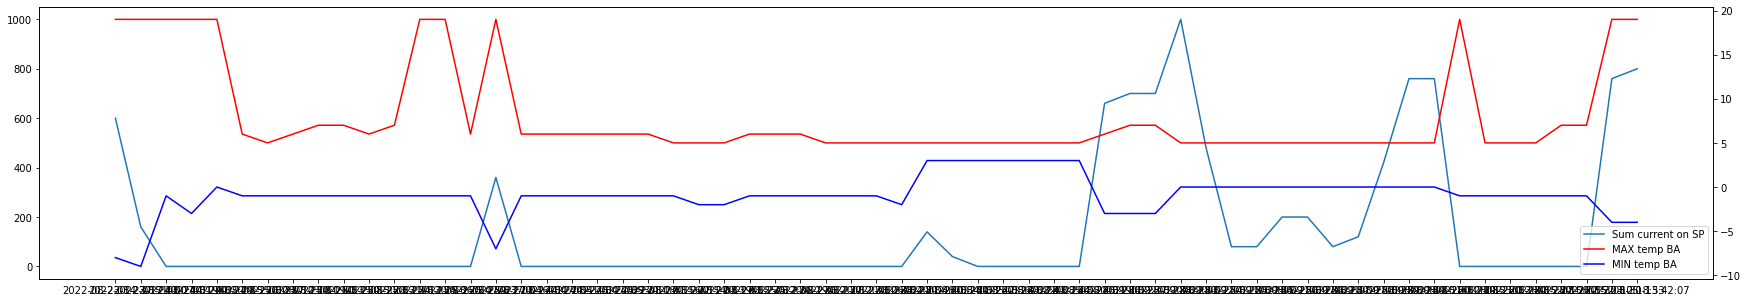

In [297]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Current from SP1 [mA]'] + temp_anomalies['Current from SP3 [mA]'] + temp_anomalies['Current from SP2 [mA]'],
                   label="Sum current on SP")
curve2, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Max Temp BA [C]'], label="MAX temp BA", color='r')
curve3, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Min Temp BA [C]'], label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

plt.legend(curves, [curve.get_label() for curve in curves])

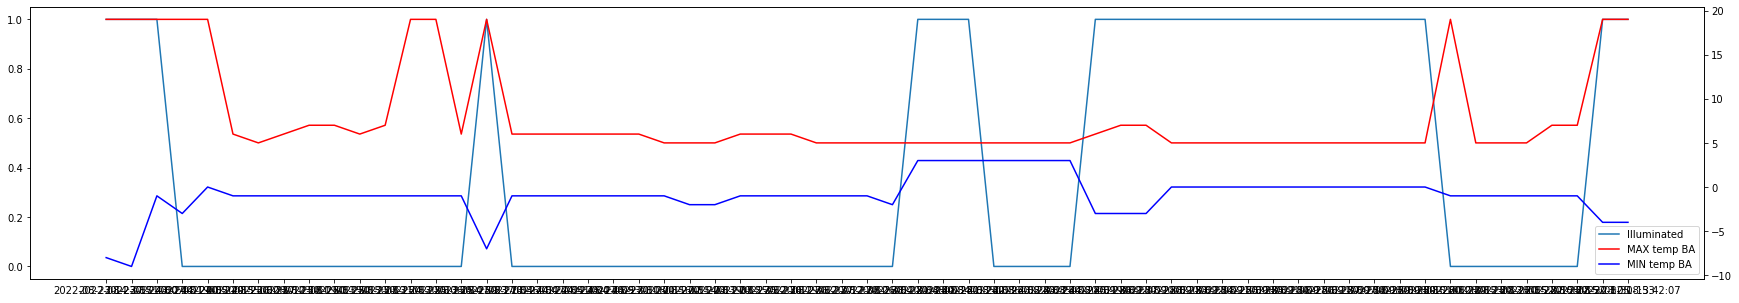

In [259]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Illuminated'],
                   label="Illuminated")
curve2, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Max Temp BA [C]'], label="MAX temp BA", color='r')
curve3, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Min Temp BA [C]'], label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3]

plt.legend(curves, [curve.get_label() for curve in curves])

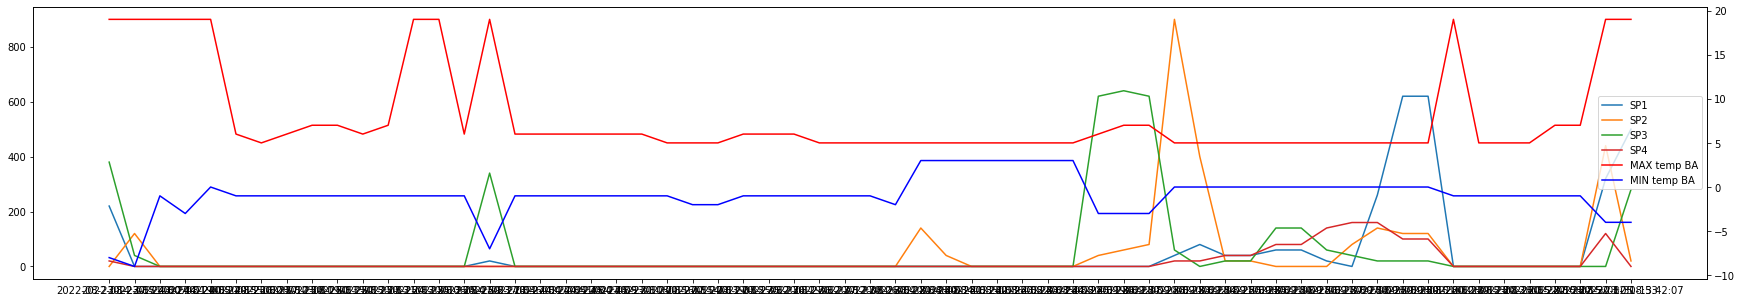

In [298]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.subplots()
ax2 = ax1.twinx()

curve1, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Current from SP1 [mA]'], label="SP1")
curve2, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Current from SP2 [mA]'], label="SP2")
curve3, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Current from SP3 [mA]'], label="SP3")
curve4, = ax1.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Current from SP4 [mA]'], label="SP4")
curve5, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Max Temp BA [C]'], label="MAX temp BA", color='r')
curve6, = ax2.plot(temp_anomalies['TOA (UTC+0)'], temp_anomalies['Min Temp BA [C]'], label="MIN temp BA", color='b')

curves = [curve1, curve2, curve3, curve4, curve5, curve6]

plt.legend(curves, [curve.get_label() for curve in curves])